DSC160 Data Science and the Arts - Twomey - Spring 2020 - [dsc160.roberttwomey.com](http://dsc160.roberttwomey.com)

## Generate Large Bitmap Figures

This notebook shows how to take a series of thumbnail images and x-y coordinates to make a large, high resolution bitmap image displaying artworks (paintings for instance) in some "style space."

This will be used to make high res bitmap figures like this https://www.flickr.com/photos/culturevis/5921447898/ from http://lab.softwarestudies.com/2011/06/mondrian-vs-rothko-footprints-and.html.

You can adapt this script to your own images and figures you wish to generate.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from skimage import io
from scipy import ndimage
from skimage.color import rgb2hsv
import skimage
from PIL import Image
import random

### Load and display images with skimage

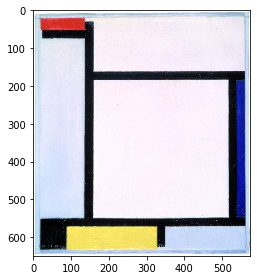

In [4]:
abstract = io.imread('https://images.rkd.nl/rkd/thumb/650x650/56c1a7ff-4661-12ea-e5bc-0f8be29c977a.jpg')
io.imshow(abstract)
io.imsave("abstract.jpg", abstract)

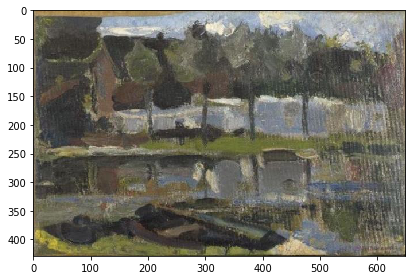

In [5]:
# landscape = io.imread('https://images.rkd.nl/rkd/thumb/650x650/f4ecda17-2066-67e9-aa3f-b6d58df1607c.jpg')
landscape = io.imread('https://images.rkd.nl/rkd/thumb/650x650/bcb9558d-08a1-a57f-b5fc-ec562c446838.jpg')
io.imshow(landscape)
io.imsave("landscape.jpg", landscape)

### Create a thumbnail

In [6]:
# make thumbnail
landscape = Image.open("landscape.jpg") #25x25
size = 128, 128
landscape.thumbnail(size)
landscape.save("land_thumb.jpg")

In [7]:
abstract = Image.open("abstract.jpg") #25x25
size = 128, 128
abstract.thumbnail(size)
abstract.save("abs_thumb.jpg")

### Create a folder full of thumbnails

https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#create-thumbnails

In [8]:
landscape = Image.open("landscape.jpg") #25x25
size = 256, 256
landscape.thumbnail(size)
landscape.save("land_thumb.jpg")

### Create large plot on empty canvas

In [9]:
# create background image
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)

In [10]:
# generate random coords (substitute your calculated coordinates for given plot)
num_points = 100
coords = [(int(random.random()*GLOBAL_WIDTH), int(random.random()*GLOBAL_WIDTH)) for _ in range(num_points)]

In [11]:
# make a list of corresponding thumbnails (random for now, substitute with yours)
filenames = ["abs_thumb.jpg", "land_thumb.jpg"]
thumbs = random.choices(filenames, k=num_points)

In [12]:
# iterate over images/coords and draw to image
for i in range(len(coords)):
    thumb_img = Image.open(thumbs[i])
    figure.paste(thumb_img, coords[i])

In [17]:
coords


[(2290, 5206),
 (1425, 2276),
 (191, 4226),
 (3635, 542),
 (999, 2513),
 (668, 4483),
 (2855, 3980),
 (2955, 5930),
 (4230, 4087),
 (590, 7107),
 (5204, 3610),
 (4142, 1087),
 (1317, 1201),
 (6459, 4439),
 (5397, 2422),
 (5390, 4855),
 (2081, 3309),
 (1987, 5135),
 (5105, 626),
 (3927, 4706),
 (2929, 4875),
 (6406, 3531),
 (567, 214),
 (3080, 3232),
 (1904, 370),
 (2944, 8),
 (6910, 679),
 (4415, 3491),
 (6690, 4405),
 (3748, 1048),
 (441, 5838),
 (4138, 2083),
 (805, 3932),
 (5343, 1335),
 (706, 6177),
 (3793, 5703),
 (5710, 1400),
 (6135, 863),
 (838, 2450),
 (5629, 4127),
 (3825, 838),
 (1360, 2669),
 (3932, 5748),
 (115, 7107),
 (3989, 5799),
 (3979, 1608),
 (4677, 3350),
 (1229, 2047),
 (2630, 5128),
 (5716, 3073),
 (5661, 2414),
 (709, 3733),
 (6860, 3657),
 (6550, 3350),
 (6287, 4572),
 (2974, 7175),
 (113, 4780),
 (5529, 4105),
 (3370, 3376),
 (3063, 3396),
 (5207, 359),
 (1103, 4409),
 (4240, 3264),
 (532, 321),
 (3511, 6548),
 (7199, 2451),
 (6300, 6384),
 (820, 5871),
 (5476

### Write to file

different file formats have different tradeoffs: 
- TIF and PNG are huge (670 MB, uncompressed)
- JPG is more manageable for testing

In [ ]:
# background.save("figure.tif")
# background.save("figure.png")
figure.save("figure.jpg")

### Display Generated Figure in-Notebook

In [ ]:
image = plt.imread("figure.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Demonstration Image")